# Credit Card Fraud – Anomaly Detection & Explainability

This notebook serves as an introduction to the dataset and provides an overview of the data and the datasets properties

## Intro

In [3]:
from pathlib import Path
import pandas as pd

# path to data
data_path = Path("../datasets/archive/creditcard.csv")

df = pd.read_csv(data_path)

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 284807 rows and 31 columns.


In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## A little bit about the Data Set I am working with:

Dataset Credit Card Fraud Detection at source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.
Due to confidentiality reasons original features cannot be provided and no additional background information about the data is given.
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
* Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
* The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

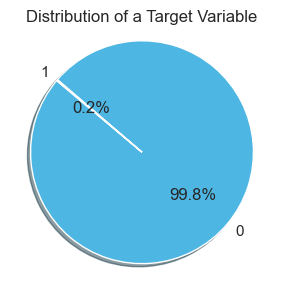

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = ['#4db6e3', '#709ac9', '#947eb0', '#b76296', '#db467d']
sns.set_theme(palette=palette, style='darkgrid')

# Count the occurrences of each category
status_counts = df.Class.value_counts()

# Pie chart
plt.figure(figsize=(3, 3))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=palette, shadow=True)

plt.title('Distribution of a Target Variable')
plt.axis('equal')
plt.tight_layout()
plt.show()

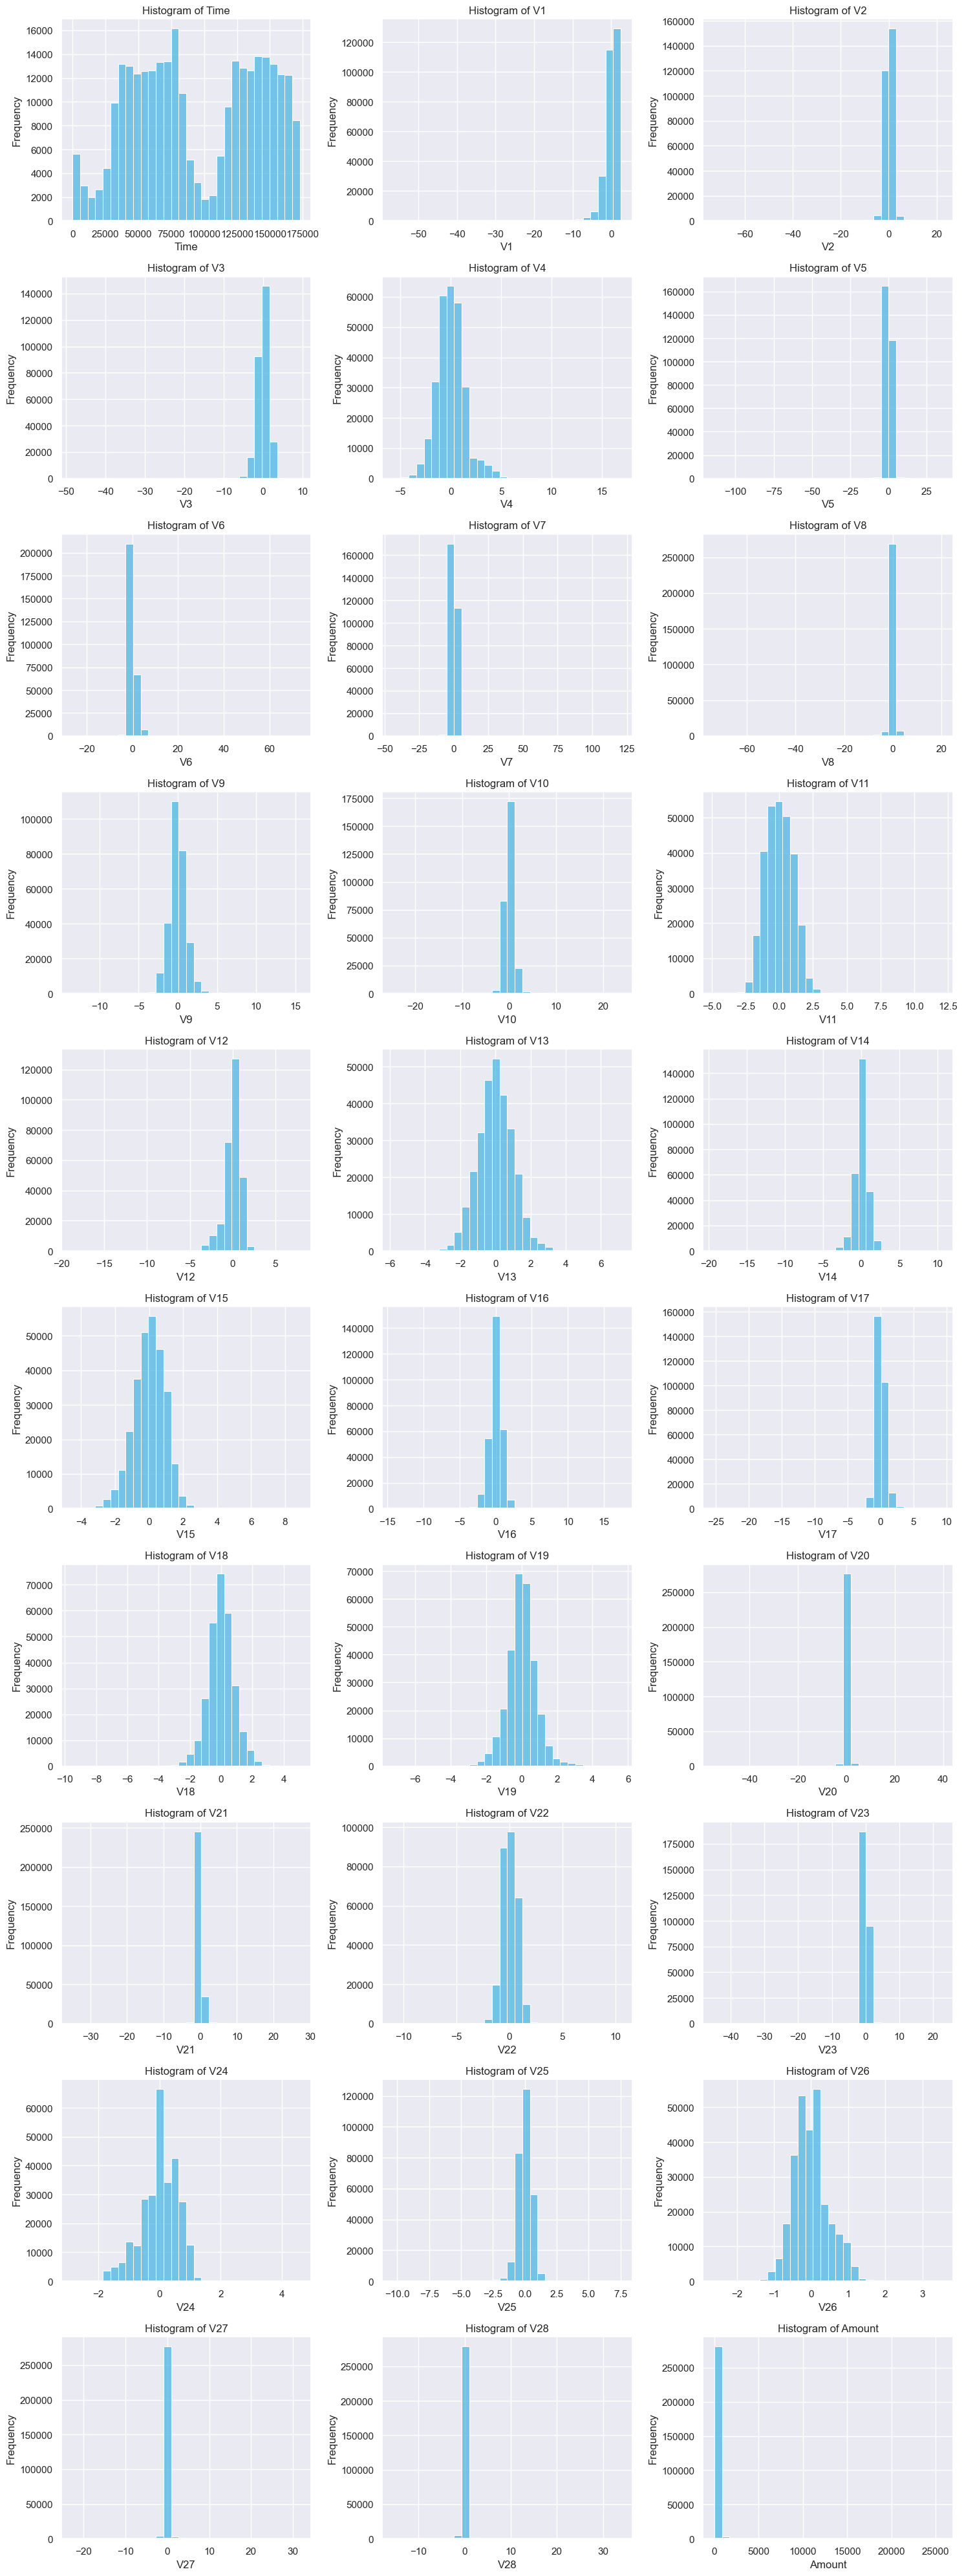

In [10]:
# Feature names
features = df.columns[:-1]

# Set up the figure; 10 rows (10*3=30 subplots), adjust as needed
fig, axes = plt.subplots(10, 3, figsize=(15, 40))

# Flatten axes array to loop through easily
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=axes[i], kde=False, bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots if features < 30
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## About the Project

The code around this dataset is organized in the following way:

In [1]:
# project_root/
# │
# ├── Credit_Card_Fraud_ULB/
# │   ├── 01_Dataset_Introduction.ipynb       ← contains information about the dataset
# │   ├── 02_IsolationForest.ipynb           ← contains imports, loading, constants, feature‐transformation, isolation‐forest code, 
# │   │                                         background/data split, SHAP, LIME, explainability metrics, logging
# │   ├── 03_LocalOutlierFactor.ipynb         ← same structure, but with LOF code
# │   ├── 04_OneClassSVM.ipynb                ← same structure, but with OneClassSVM code
# │   ├── 05_Autoencoder.ipynb                ← same structure, but with AE code
# │   ├── 06_VariationalAutoencoder.ipynb     ← same structure, but with VAE code
# │   │                
# │   └── results
# │       └── isolation_forest              ← exemplary, same for other 4 models
# │           └── data
# │           └── explainers
# │           └── model
# │           └── json files with logs
# │           └── pkl files
# │
# └── datasets/
#     └── archive/
#         └── creditcard.csv